# 4. Towards intensity-based image registration

## 4.1. Numerical differentiation
Numerical differentiation refers to finding the value of a derivative of a given function at a given point without the need to analytically differentiate the function. This technique can be very useful, for example, when the analytical expression for the derivative is too complex and computationally expensive to evaluate. In such a case it might be significantly faster to approximate the derivative instead of computing its exact value.

A simple expression that approximates the derivative of a function $f(x)$ is:

\begin{equation}
\frac{d}{d x} f(x) \approx \frac{f(x+h)-f(x)}{h}
\end{equation}

where $h$ is some very small positive number. When $h$ approaches zero this expression becomes the true value of the derivative:

\begin{equation}
\frac{d}{d x} f(x)=\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}
\end{equation}

A better approximation of the derivative is the symmetric difference quotient given by the following expression:

\begin{equation}
\frac{d}{d x} f(x) \approx \frac{f\left(x+\frac{h}{2}\right)-f\left(x-\frac{h}{2}\right)}{h}
\end{equation}

Numerical differentiation can also be used to approximate the partial derivatives of a function with more than one variable, for example:

\begin{equation}
\frac{\partial}{\partial x} f(x, y) \approx \frac{f\left(x+\frac{h}{2}, y\right)-f\left(x-\frac{h}{2}, y\right)}{h}
\end{equation}

\begin{equation}
\frac{\partial}{\partial y} f(x, y) \approx \frac{f\left(x, y+\frac{h}{2}\right)-f\left(x, y-\frac{h}{2}\right)}{h}
\end{equation}

and in turn the gradient:

\begin{equation}
\ f(x, y)=\left[ \begin{array}{c}{\frac{\partial}{\partial x} f(x, y)} \\ {\frac{\partial}{\partial y} f(x, y)}\end{array}\right] \approx\left[\frac{\frac{f\left(x+\frac{h}{2}, y\right)-f\left(x-\frac{h}{2}, y\right)}{h}}{\frac{f\left(x, y+\frac{h}{2}\right)-f\left(x, y-\frac{h}{2}\right)}{h}}\right]
\end{equation}

### (A)
### EXERCISE:
In the provided template for the `ngradient()` function in `# SECTION 4` of the `registration.py` module, implement the computation of the gradient of a function with numerical differentiation using the symmetric difference quotient. 

### (B)
### EXERCISE:
Test your implementation of `ngradient()`. An easy way to test this function is to numerically compute the gradient and then verify with the analytical expression. For example, since $\frac{d}{d x} e^{x}=e^{x}$ the the numerical derivative $\frac{d}{d x} e^{x}$ should have approximately the same value as $e^{x}$. Write your test cases in the provided `ngradient_test()` script in `# SECTION 4` of the `registration_tests.py` module.

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import ngradient_test

ngradient_test()

### (C)
### QUESTION:
The `ndgradient()` function can be used to perform optimization with the gradient ascent/descent method. Describe in short how this algorithm works. What is the role of the learning rate parameter in gradient descent/ascent?

## 4.2. Similarity as a function of image transformation

In the previous section, you have analyzed how the similarity between two images changes as a function of the rotation of one of the images. The goal of this exercise is to write a Python function that, given two images and the parameters of some transformation between them, will output the similarity measure. This function can then be used in combination with `ndgradient()` from the previous exercise to perform gradient based optimization of the transformation parameters.

### (A)
The function `rigid_corr()` in `# SECTION 4` of the `registration.py` module computes the normalized cross-correlation between a fixed and a moving image transformed with rigid transformation. The three parameters of the rigid transformation (rotation angle and 2D translation vector) are passed to the function as a vector $\mathbf{x}$.

Here is an example of how to use this function to numerically compute the derivative for a set of parameters:

```python
import numpy as np
import matplotlib.pyplot as plt
from registration_utils import ngradient

I = plt.imread('some_fixed_image.tif')
Im = plt.imread('some_moving_image.tif')

# create an instance of rigid_corr for this particular pair of images
rigid_corr_I_Im = lambda x: rigid_corr(I, Im, x)

x = [np.pi/4, 10/100, 20/100]

# computes the numerical gradient at x
g = reg.ndgradient(rigid_corr_I_Im, x)
```

In this code snippet, we first create an instance of the function `rigid_corr()` where the first to input parameters (the fixed and moving image) are preset. The new function `rigid_corr_I_Im()` now has only a single input parameter - the vector $\mathbf{x}$ that stores the rotation angle and the translation. `rigid_corr_I_Im()` can be used with `ndgradient()` to compute the gradient of the similarity function at a particular point (in this example for the point `x = [pi/4, 10/100, 20/100]`). 

### QUESTION:
Let's assume that after executing this code snippet, the computed value for the derivative at point `x = [pi/4, 10, 20]` is `g = [10, -5, 30]`. Will increasing the rotation angle (the first parameter of $\mathbf{x}$) by a very small amount increase or decrease the similarity between the fixed and transformed moving image? Motivate your answer.

### (B)
### EXERCISE:
Using `rigid_corr()` as an example, implement the following two functions in `# SECTION 4` of the `registration.py` module:
1. `affine_corr()` that computes the normalized cross correlation for a pair of images as a function of affine transformation, and
2. `affine_mi()` that computes the mutual information between a pair of images as a function of affine transformation.

The only thing that you need to change is the length of the parameter vector, which for affine registration should contain the rotation, scaling, shearing and translation parameters, the computation of the transformation matrix and for `affine_mi()` the function call that computes the similarity measure.

## 4.3. Similarity as a function of rotation

Let's put the implementations of correlation and mutual information functions to some use. You are going to compute the similarity between an image and a rotated version of that image for different rotation angles. The `registration_metrics_demo()` Python function contains code for performing this analysis. Study the function and make sure you understand what it does (you can skip the part about visualization of the results).

### (A)
### EXERCISE:
Run the demo and describe and analyze the results.

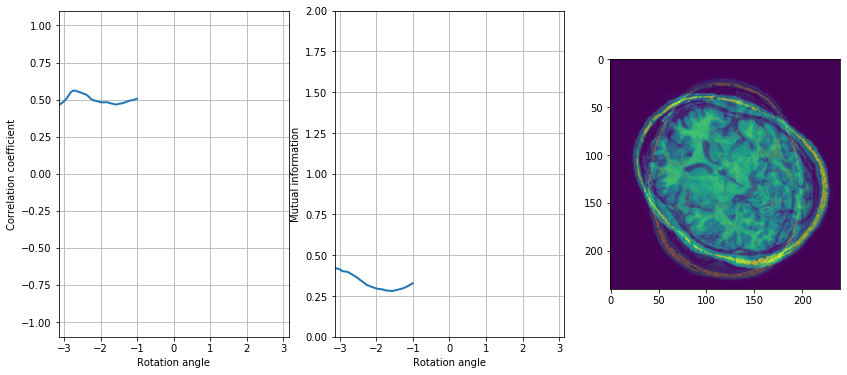

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import registration_metrics_demo

registration_metrics_demo()

### (B)
### QUESTION:
Run the demo again but this time compute the similarity of the T1 image with a rotated version of the T2 image for different angles (note that the T1 and T2 images in this example are registered). Describe and analyze the results. Would the normalized cross-correlation metric be suitable to register the T1 and T2 images? Which of the two analyzed metrics would be more appropriate? Motivate your answer.